In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Load the graph
gml_file = 'youtube_cyberbullying_graph.gml'
G = nx.read_gml(gml_file)

In [3]:
# Step 1: Extract centrality measures as features
pr = nx.pagerank(G, alpha=0.8)
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Combine centrality measures into a DataFrame
features = pd.DataFrame({
    "PageRank": pr.values(),
    "Degree Centrality": degree_centrality.values(),
    "Closeness Centrality": closeness_centrality.values(),
    "Betweenness Centrality": betweenness_centrality.values()
})

In [4]:
# Step 2: Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

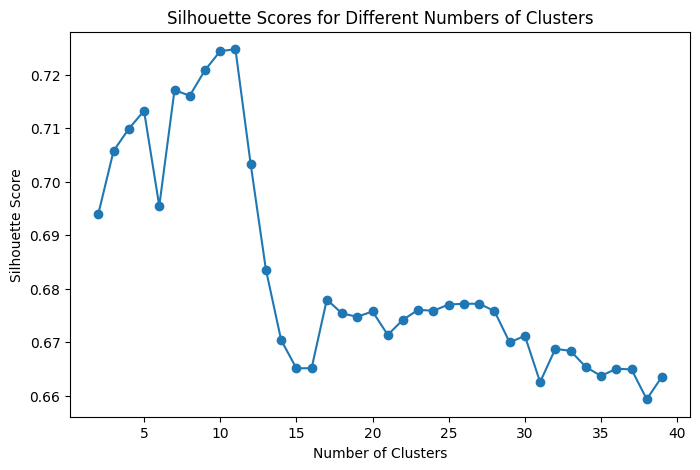

In [5]:
# Step 3: Find the optimal number of clusters using Silhouette Score
silhouette_scores = []
cluster_range = range(2, 40)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [6]:
# Step 4: Apply K-Means with optimal number of clusters (based on silhouette score)
optimal_k = cluster_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [7]:
# Step 5: Add cluster labels to the DataFrame
features['Cluster'] = clusters

In [8]:
# Step 6: Save clustered nodes to CSV
features['Node'] = list(pr.keys())
features.to_csv('clustered_nodes.csv', index=False)
print("Clustered nodes saved to 'clustered_nodes.csv'.")

Clustered nodes saved to 'clustered_nodes.csv'.


In [9]:
# Step 7: Visualize clusters in the graph (optional)
import matplotlib.pyplot as plt

In [10]:
# Assign cluster as a node attribute for visualization
for node, cluster in zip(features['Node'], features['Cluster']):
    G.nodes[node]['Cluster'] = cluster

In [ ]:
# Draw the graph with nodes colored by cluster
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
node_colors = [G.nodes[node].get('Cluster', 0) for node in G.nodes()]
nx.draw_networkx(G, pos, node_color=node_colors, cmap=plt.cm.tab10, with_labels=False, node_size=50)
plt.title("Graph Clusters (K-Means)")
plt.show()